In [41]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np  # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iris/Iris.csv
/kaggle/input/iris/database.sqlite


In [42]:
# reading the iris data
df = pd.read_csv('../input/iris/Iris.csv')
# Print the first 5 rows of the data
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [43]:
# Print the last five rows of the data
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [44]:
# Print a concise summary of the Iris DataFrame.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [47]:
# Check the Descriptive statistics for nomerical data
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [49]:
# Print number of spiecies in the df
df.Species.value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64

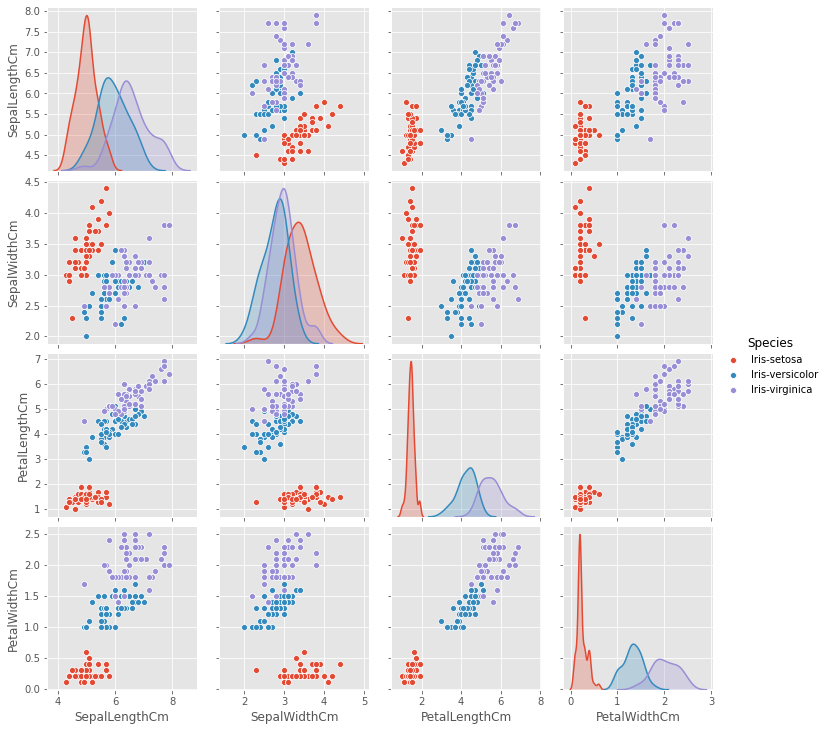

In [51]:
_ = sns.pairplot(df.drop('Id', axis=1), hue='Species', markers='o')

- It's clear that Iris-Setosa very different than the other 2 types of iris (versicolor & virginica).  
- PetalLengthCm & PetalWidthCm is the most important feature that can differentiate between iris types.

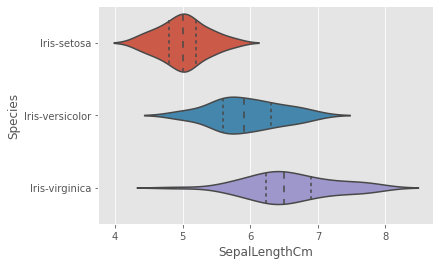

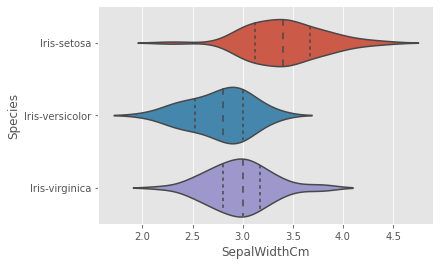

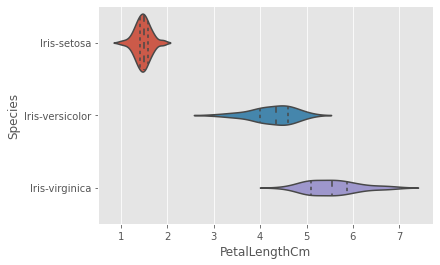

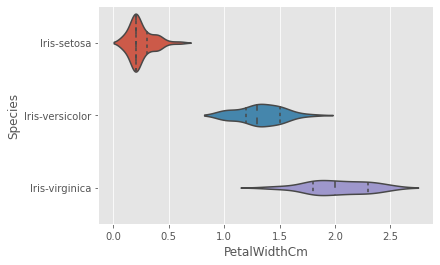

In [48]:
# SepalLengthCm
sns.violinplot(y='Species', x='SepalLengthCm', data=df, inner='quartile')
plt.show()

# SepalWidthCm
sns.violinplot(y='Species', x='SepalWidthCm', data=df, inner='quartile')
plt.show()

# PetalLengthCm
sns.violinplot(y='Species', x='PetalLengthCm', data=df, inner='quartile')
plt.show()

# PetalWidthCm
sns.violinplot(y='Species', x='PetalWidthCm', data=df, inner='quartile')
plt.show()

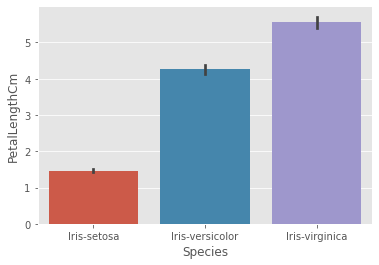

In [52]:
_ = sns.barplot(df['Species'], df['PetalLengthCm'])

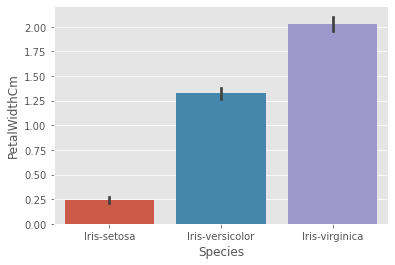

In [53]:
_ = sns.barplot(df['Species'], df['PetalWidthCm'])

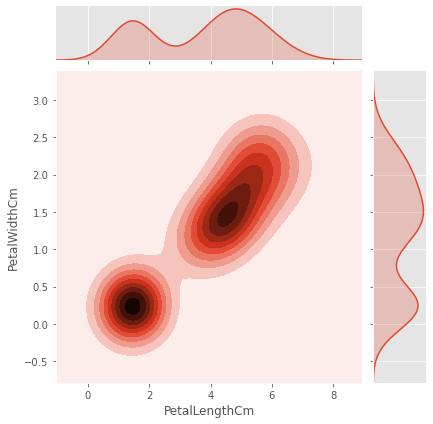

In [54]:
# In the plot below, the color-coding shows us how likely we are to see different combinations
# of petal width and petal length, where darker parts of the figure are more likely.
_ = sns.jointplot(x=df['PetalLengthCm'], y=df['PetalWidthCm'], kind="kde")

In [55]:
# Define X, y
X = df.drop(['Id', 'Species'], axis=1)
y = df['Species']
# print(X.head())
print(X.shape)
# print(y.head())
print(y.shape)

(150, 4)
(150,)


In [56]:
from sklearn.model_selection import train_test_split

# Split train and test datasets (X, y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [57]:
# SGD Model
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score

for i in range(10):
    # fit model
    sgd = SGDClassifier(alpha=0.1).fit(X_train, y_train)
    # prdeict Iris type
    y_pred = sgd.predict(X_test)
    # Print Model accuracy
    print(accuracy_score(y_pred, y_test))

0.74
0.86
1.0
0.88
0.8
0.76
0.84
0.74
0.8
0.82


stochastic gradient descent (SGD) model is not reliable.

In [58]:
# KNN Model
from sklearn.neighbors import KNeighborsClassifier

# fit model
knn = KNeighborsClassifier(n_neighbors=12).fit(X_train, y_train)
# prdeict Iris type
y_pred_knn = knn.predict(X_test)
# Print Model accuracy
print(accuracy_score(y_pred_knn, y_test))

1.0


In [59]:
# Logistic Regression MOde
from sklearn.linear_model import LogisticRegression

# fit model
lr = LogisticRegression().fit(X_train, y_train)
# prdeict Iris type
y_pred_lr = lr.predict(X_test)
# Print Model accuracy
print(accuracy_score(y_pred_lr, y_test))

1.0


In [60]:
from sklearn.tree import DecisionTreeClassifier

# fit model
dt = DecisionTreeClassifier().fit(X_train, y_train)
# prdeict Iris type
y_pred_dt = dt.predict(X_test)
# Print Model accuracy
print(accuracy_score(y_pred_dt, y_test))

0.96


I prefer Logistic Regression model for the data.